<a href="https://colab.research.google.com/github/weisses1/swcolabfiles/blob/main/Kmeans_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Part 1:

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/data/mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop(columns = 'CustomerID')
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df.rename(columns = {'Genre':'Gender',"Annual Income (k$)":"Income","Spending Score (1-100)":"Spend_Score"}, inplace = True)

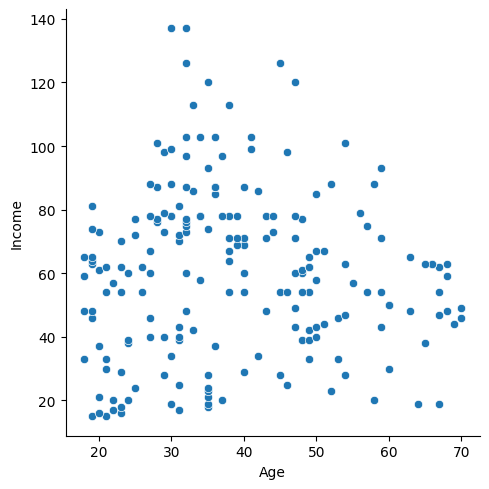

In [5]:
sns.relplot(data = df,x = 'Age',y="Income")

In [6]:
x_2d = ['Income','Age']

In [7]:
scaler = StandardScaler()
x_2d_s = scaler.fit_transform(df[x_2d])

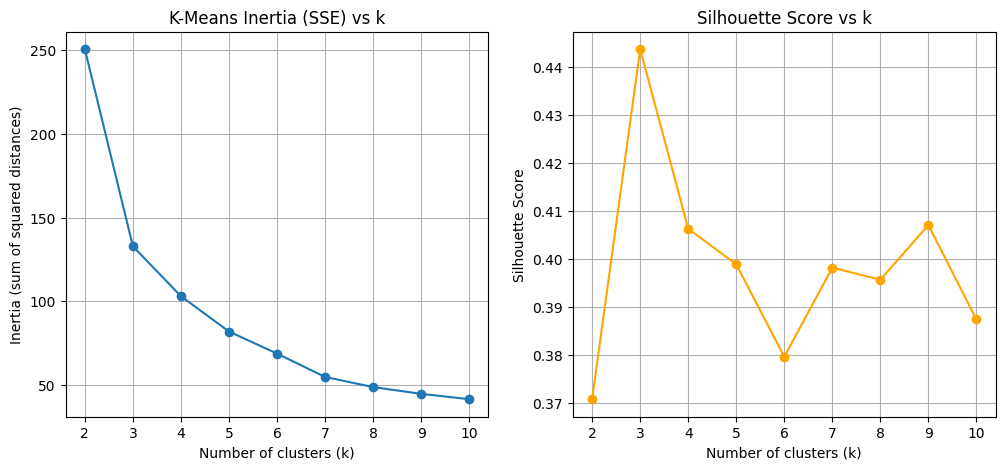

In [8]:
k_values = range(2, 11)

inertia_list = [] #how tightly the clusters are packed, sum of squared distances between each point and its assigned cluster
#always decreases
silhouette_list = [] #measures how similar a point is to its own cluster compared to other clusters, -1 to 1
#the higher the silhouette score, the better-defined clusters

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(x_2d_s)  # your scaled features
    inertia_list.append(km.inertia_)
    silhouette_list.append(silhouette_score(x_2d_s, labels))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertia_list, marker='o')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouette_list, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

#k=3 seems to be the winner for age and salary labels

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(x_2d_s)

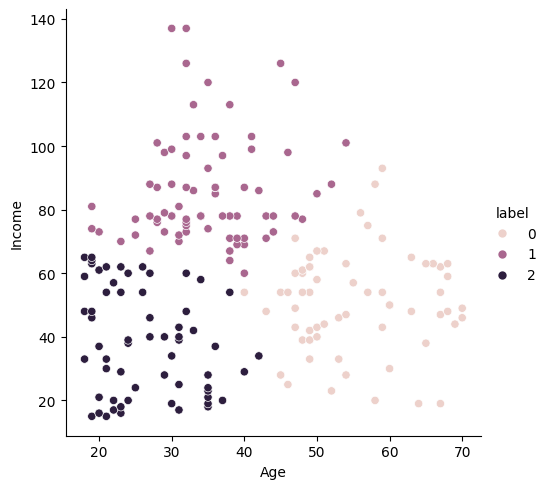

In [10]:
df2 = df.copy()
df2['label'] = labels
sns.relplot(kind='scatter', data = df2, x = 'Age', y='Income', hue = 'label')

In [11]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

In [12]:
centers_df = pd.DataFrame(centers,columns=['Income','Age'])
centers_df['label'] = 'Center'
centers_df
#typical age and income

,Income,Age,label
0,51.269841,55.555556,Center
1,85.934211,34.960526,Center
2,38.540984,26.442623,Center


In [13]:
df2['Cluster'] = labels
df2['Cluster'].value_counts()
#how many in each group

,count
Cluster,
1,76
0,63
2,61


In [14]:
df2.groupby('Cluster').agg({'Age':['min','max'],'Income':['min','max']})

Age     Income     
        min max    min  max
Cluster                    
0        40  70     19   93
1        19  54     60  137
2        18  42     15   65

### Part 2:

In [15]:
x_3d = ['Income','Age','Spend_Score']

In [16]:
scaler = StandardScaler()
x_3d_s = scaler.fit_transform(df[x_3d])

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
labels = kmeans.fit_predict(x_3d_s)
df3 = df.copy()
df3['label'] = labels

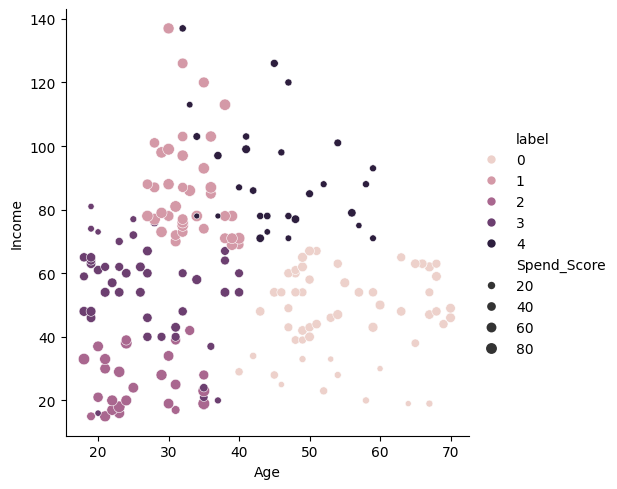

In [18]:
sns.relplot(kind='scatter', data = df3, x = 'Age', y='Income', size='Spend_Score',hue = 'label')

In [19]:
centers_scaled = kmeans.cluster_centers_
centers2 = scaler.inverse_transform(centers_scaled)

In [20]:
centers2_df = pd.DataFrame(centers2,columns=['Income','Age','Spend_Score'])
centers2_df['label'] = 'Center'
centers2_df

,Income,Age,Spend_Score,label
0,47.620690,55.275862,41.706897,Center
1,86.100000,32.875000,81.525000,Center
2,26.115385,25.769231,74.846154,Center
3,54.311111,26.733333,40.911111,Center
4,89.774194,44.387097,18.483871,Center


In [21]:
df3['Cluster'] = labels
df3['Cluster'].value_counts()
#how many in each group

,count
Cluster,
0,58
3,45
1,40
4,31
2,26


In [22]:
df3.groupby('Cluster').agg({'Age':['min','max'],'Income':['min','max']})

Age     Income     
        min max    min  max
Cluster                    
0        40  70     19   67
1        27  40     69  137
2        18  35     15   42
3        18  40     16   81
4        32  59     71  137

## Part 3:

In [57]:
df_m = df[df['Gender'] == 'Male']
df_f = df[df['Gender'] == 'Female']

In [58]:
df2_m = df_m[['Age', 'Spend_Score']]
df2_f = df_f[['Age', 'Spend_Score']]

In [59]:
scaler_m = StandardScaler()
x_m_s = scaler_m.fit_transform(df2_m)

scaler_f = StandardScaler()
x_f_s = scaler_f.fit_transform(df2_f)

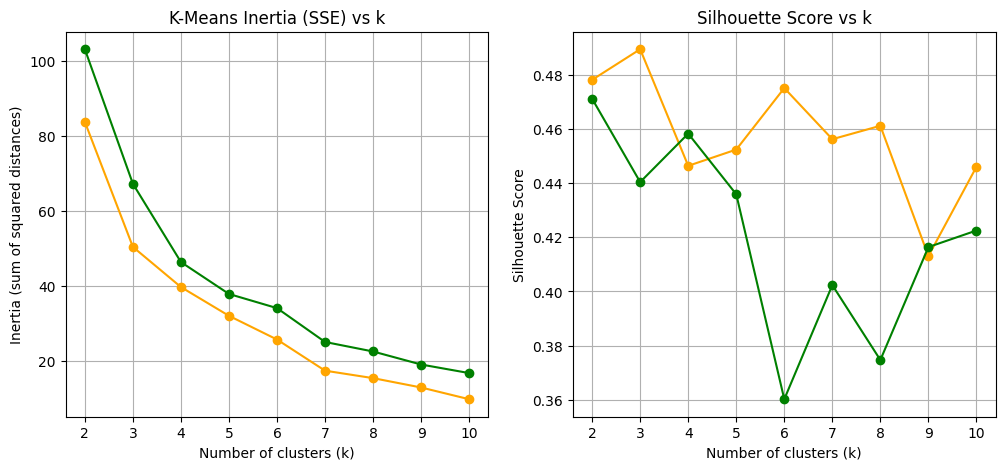

In [60]:
k_values = range(2, 11)

inertiam_list = [] #how tightly the clusters are packed, sum of squared distances between each point and its assigned cluster
#always decreases
inertiaf_list = []
silhouettem_list = []
silhouettef_list = [] #measures how similar a point is to its own cluster compared to other clusters, -1 to 1
#the higher the silhouette score, the better-defined clusters

for k in k_values:
    kmm = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labelsm = kmm.fit_predict(x_m_s)
    inertiam_list.append(kmm.inertia_)
    silhouettem_list.append(silhouette_score(x_m_s, labelsm))
for k in k_values:
    kmf = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labelsf = kmf.fit_predict(x_f_s)
    inertiaf_list.append(kmf.inertia_)
    silhouettef_list.append(silhouette_score(x_f_s, labelsf))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertiam_list, marker='o', color='orange')
axes[0].plot(k_values, inertiaf_list, marker='o', color='green')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouettem_list, marker='o', color='orange')
axes[1].plot(k_values, silhouettef_list, marker='o', color='green')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

#k=4 seems to be the winner for female age and spend score labels
#k=3 seems to be the winner for male age and spend score labels


In [61]:
kmeans_m = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels_m = kmeans_m.fit_predict(x_m_s)
df_m2 = df_m.copy()
df_m2['label'] = labels_m

kmeans_f = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels_f = kmeans_f.fit_predict(x_f_s)
df_f2 = df_f.copy()
df_f2['label'] = labels_f

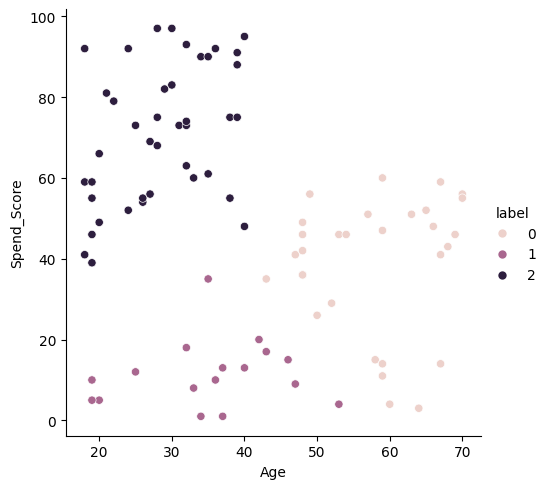

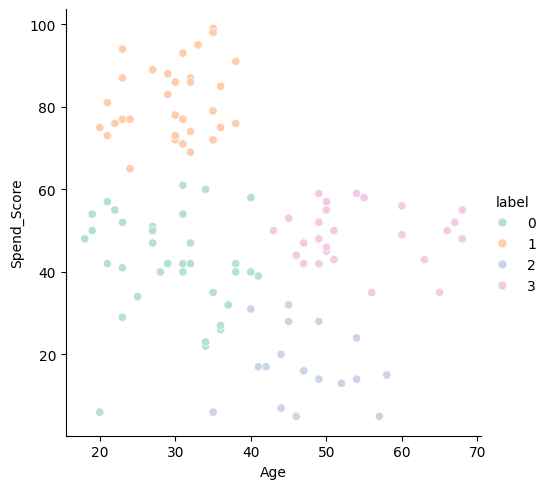

In [62]:
sns.relplot(data=df_m2, x='Age', y='Spend_Score', hue='label')

sns.relplot(data=df_f2, x='Age', y='Spend_Score', hue='label', palette='Pastel2')

In [63]:
centers_scaled_m = kmeans_m.cluster_centers_
centers_m = scaler_m.inverse_transform(centers_scaled_m)

centers_scaled_f = kmeans_f.cluster_centers_
centers_f = scaler_f.inverse_transform(centers_scaled_f)

In [64]:
centers_m_df = pd.DataFrame(centers_m,columns=['Age','Spend_Score'])
centers_m_df['label'] = 'Center'
centers_m_df

,Age,Spend_Score,label
0,57.833333,38.600000,Center
1,35.176471,11.529412,Center
2,28.536585,71.097561,Center


In [65]:
centers_f_df = pd.DataFrame(centers_f,columns=['Age','Spend_Score'])
centers_f_df['label'] = 'Center'
centers_f_df

,Age,Spend_Score,label
0,29.500000,42.000000,Center
1,29.617647,81.235294,Center
2,47.166667,17.111111,Center
3,54.153846,48.961538,Center


In [67]:
df_m2['Cluster'] = labels_m
df_m2['Cluster'].value_counts()
#how many in each group male

,count
Cluster,
2,41
0,30
1,17


In [68]:
df_f2['Cluster'] = labels_f
df_f2['Cluster'].value_counts()
#how many in each group female

,count
Cluster,
0,34
1,34
3,26
2,18


In [71]:
df_m2.groupby('Cluster').agg({'Age':['min','max'],'Spend_Score':['min','max']})

Age     Spend_Score    
        min max         min max
Cluster                        
0        43  70           3  60
1        19  53           1  35
2        18  40          39  97

In [72]:
df_f2.groupby('Cluster').agg({'Age':['min','max'],'Spend_Score':['min','max']})

Age     Spend_Score    
        min max         min max
Cluster                        
0        18  41           6  61
1        20  38          65  99
2        35  58           5  32
3        43  68          35  59